# PCA(주성분 분석)
---
- 전체 특성(Feature)에서 주요 특성 압축/융합하는 비지도 학습
- fit() + transform() 2단계를 거쳐 주성분 분석

In [177]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### [1] 데이터 준비

In [178]:
data, target = load_iris(return_X_y=True, as_frame=True)
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [179]:
irisDF = pd.concat([data, target], axis=1)

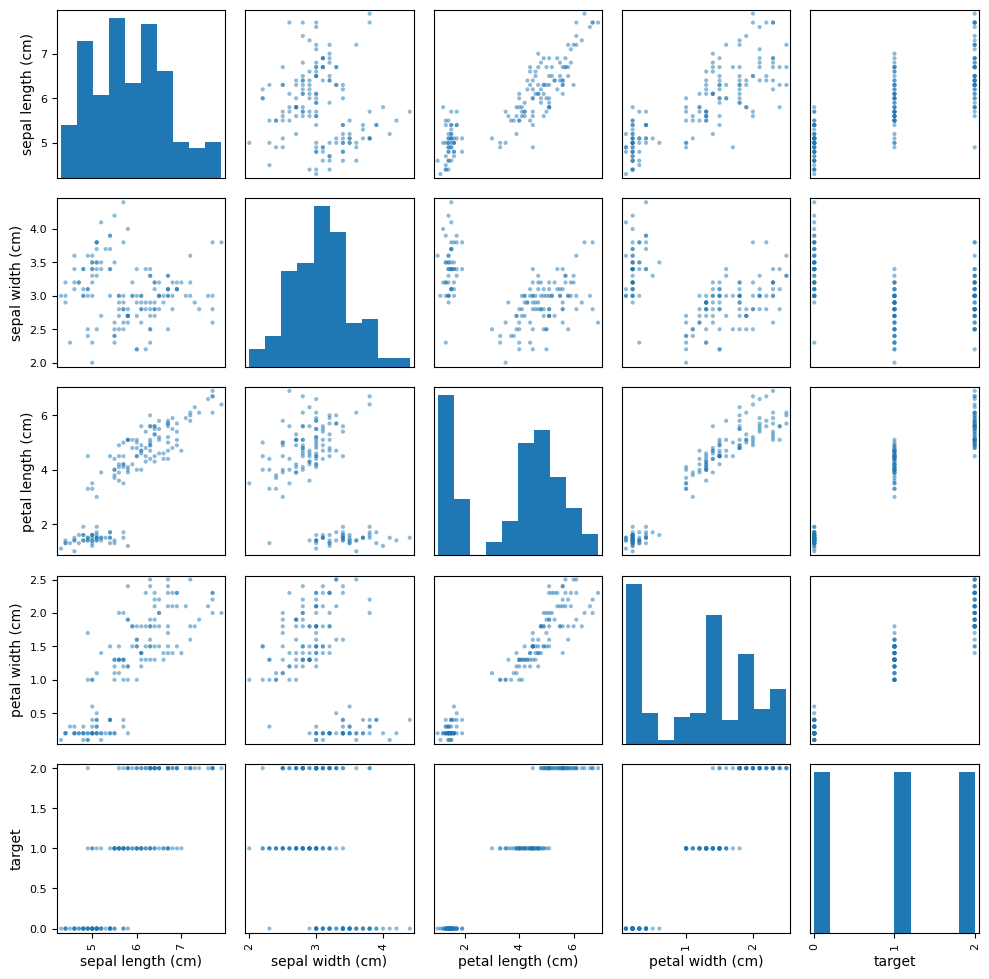

In [180]:
# 산점도 관계 EDA
scatter_matrix(irisDF,
               alpha=0.5,
               figsize=(10, 10))
plt.tight_layout()
# plt.show()

In [181]:
target_0 = irisDF[irisDF.target == 0]
target_1 = irisDF[irisDF.target == 1]
target_2 = irisDF[irisDF.target == 2]

In [182]:
target_0.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


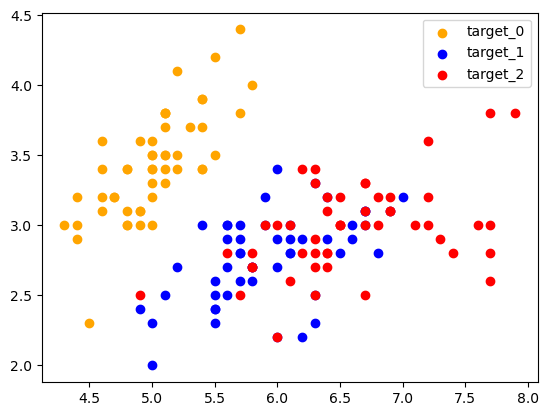

In [183]:
plt.scatter(target_0['sepal length (cm)'], target_0['sepal width (cm)'], c='orange')
plt.scatter(target_1['sepal length (cm)'], target_1['sepal width (cm)'], c='blue')
plt.scatter(target_2['sepal length (cm)'], target_2['sepal width (cm)'], c='red')
plt.legend(['target_0', 'target_1', 'target_2'])
plt.show()

### [2] 데이터 전처리

In [184]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### [3] PCA 주성분 분석
- iris의 4개 feature 중에서 주성분 데이터 추출

In [185]:
# 지정된 데이터에서 주성분 추출 =>
pca = PCA()
pca.fit(data_scaled)

PCA()

In [186]:
# 주성분 행렬
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [187]:
# 주성분 투영 후 분산 정도 설명
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [188]:
# 주성분 투영 후 분산 정도 설명 비율로 보기
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### [4] 주성분 갯수 지정
- 방법 1 => explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC갯수 계산
- 방법 2 => n_components = 0.0 ~ 1.0 : 주성분에 투영된 데이터 분포 정도 지정하면 PC갯수 자동 계산

### [4-1] 방법 1

In [189]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print(f'주성분 갯수(차원) : {dim}')

주성분 갯수(차원) : 2


In [190]:
# 지정된 차원수(PC갯수)로 주성분 데이터 압축/융합
pca_2 = PCA(n_components=dim)
pca_2.fit(data_scaled)
irisPCA = pca_2.transform(data_scaled)

In [191]:
print(irisPCA.shape)
irisPCA[:5]

(150, 2)


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

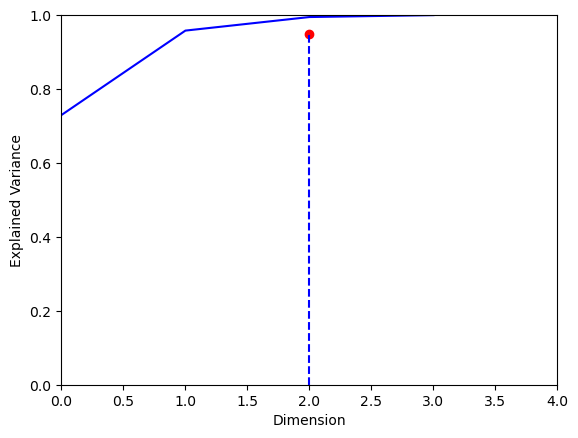

In [192]:
# 주성분과 데이터 투영 분산 저정도 시각화
plt.plot(cumsum, 'b-')
plt.plot(dim, 0.95, 'ro')
plt.plot([2.0, 2.0], [0, 0.95], 'b--')
plt.axis([0, 4, 0, 1])
plt.xlabel('Dimension')
plt.ylabel('Explained Variance')
plt.show()

### [4-2] 방법 2

In [193]:
pca_3 = PCA(n_components=0.95)
pca_3.fit(data_scaled)
irisPCA_2 = pca_3.transform(data_scaled)

In [194]:
print(pca_3.explained_variance_, pca_3.explained_variance_ratio_)
irisPCA_2[:5]

[2.93808505 0.9201649 ] [0.72962445 0.22850762]


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [195]:
pcaDF = pd.DataFrame(irisPCA_2, columns=['pca_1', 'pca_2'])
pcaDF = pd.concat([pcaDF, target], axis=1)

In [196]:
pcaDF

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [197]:
target_0 = pcaDF[pcaDF.target == 0]
target_1 = pcaDF[pcaDF.target == 1]
target_2 = pcaDF[pcaDF.target == 2]

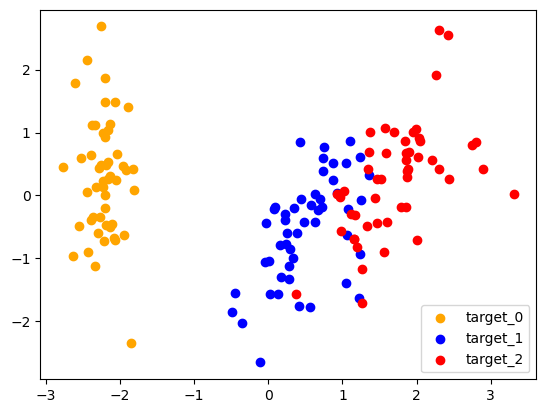

In [198]:
plt.scatter(target_0['pca_1'], target_0['pca_2'], c='orange')
plt.scatter(target_1['pca_1'], target_1['pca_2'], c='blue')
plt.scatter(target_2['pca_1'], target_2['pca_2'], c='red')
plt.legend(['target_0', 'target_1', 'target_2'])
plt.show()

In [199]:
re = pca_3.inverse_transform(irisPCA_2)
re.shape

(150, 4)